In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook



import os as os

import matplotlib.pyplot as plt

def imshow(img, cmap=None):
    plt.close('all')
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.show()
    
import scipy.ndimage as ndimage
from scipy import misc
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.signal as sig
from scipy.integrate import simpson
from IPython.display import SVG, display, IFrame, HTML
%matplotlib notebook

C:\Users\meyjoh\repos\vlcompimg\compimg\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def createPillobxResponse(r, x_size, y_size):
    X,Y = np.meshgrid(np.arange(-1*np.floor(x_size/2),np.floor(x_size/2)+1,1), np.arange(-1*np.floor(y_size/2),np.floor(y_size/2)+1,1))
    psf = np.zeros_like(X)
    psf[np.sqrt(X**2+Y**2) <= r] = 1
    return psf, X, Y
def fourier_conv(img:np.ndarray, kernel:np.ndarray) -> np.ndarray:
    
    img_fft = np.fft.fft2(img)
    
    kernel_padded = pad_like(kernel, img)
    kernel_padded_fft = np.fft.fft2(np.fft.ifftshift(kernel_padded))
    
    result = np.real(np.fft.ifft2(img_fft * kernel_padded_fft))
    
        
    return result
def mag_square(inp : np.ndarray):
    return inp.real**2 + inp.imag**2
def pad_like(inp : np.ndarray, like : np.ndarray):
    to_pad = tuple(np.int32((np.array(like.shape) - np.array(inp.shape))/2))
    return np.pad(inp, ((to_pad[0], to_pad[0]), (to_pad[1], to_pad[1])))
def make_odd_shapes(inp : np.ndarray) -> np.ndarray:
    if (inp.shape[0] % 2 == 0):
        inp = inp[0:-1,:]
    if (inp.shape[1] % 2 == 0):
        inp = inp[:,0:-1]
    return inp

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inverse-problems-part-2" data-toc-modified-id="Inverse-problems-part-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inverse problems part 2</a></span><ul class="toc-item"><li><span><a href="#Half-quadratic-splitting-method" data-toc-modified-id="Half-quadratic-splitting-method-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Half-quadratic splitting method</a></span><ul class="toc-item"><li><span><a href="#General-regularizer" data-toc-modified-id="General-regularizer-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>General regularizer</a></span><ul class="toc-item"><li><span><a href="#$\mathbf{x}$-update" data-toc-modified-id="$\mathbf{x}$-update-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>$\mathbf{x}$-update</a></span></li><li><span><a href="#$\mathbf{z}$-updates" data-toc-modified-id="$\mathbf{z}$-updates-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span>$\mathbf{z}$-updates</a></span></li></ul></li><li><span><a href="#Total-variation-regularizer" data-toc-modified-id="Total-variation-regularizer-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Total variation regularizer</a></span><ul class="toc-item"><li><span><a href="#$\mathbf{x}$-update" data-toc-modified-id="$\mathbf{x}$-update-5.1.2.1"><span class="toc-item-num">5.1.2.1&nbsp;&nbsp;</span>$\mathbf{x}$-update</a></span></li><li><span><a href="#$\mathbf{z}$-update-for-anisotropic-TV" data-toc-modified-id="$\mathbf{z}$-update-for-anisotropic-TV-5.1.2.2"><span class="toc-item-num">5.1.2.2&nbsp;&nbsp;</span>$\mathbf{z}$-update for anisotropic TV</a></span></li><li><span><a href="#$\mathbf{z}$-update-for-isotropic-TV" data-toc-modified-id="$\mathbf{z}$-update-for-isotropic-TV-5.1.2.3"><span class="toc-item-num">5.1.2.3&nbsp;&nbsp;</span>$\mathbf{z}$-update for isotropic TV</a></span></li></ul></li><li><span><a href="#Experiments-HQS" data-toc-modified-id="Experiments-HQS-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Experiments HQS</a></span><ul class="toc-item"><li><span><a href="#General-regularizer" data-toc-modified-id="General-regularizer-5.1.3.1"><span class="toc-item-num">5.1.3.1&nbsp;&nbsp;</span>General regularizer</a></span></li><li><span><a href="#TV-regularizer" data-toc-modified-id="TV-regularizer-5.1.3.2"><span class="toc-item-num">5.1.3.2&nbsp;&nbsp;</span>TV regularizer</a></span></li></ul></li></ul></li><li><span><a href="#Alternating-direction-method-of-multipliers" data-toc-modified-id="Alternating-direction-method-of-multipliers-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Alternating direction method of multipliers</a></span><ul class="toc-item"><li><span><a href="#General-regularizer" data-toc-modified-id="General-regularizer-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>General regularizer</a></span></li><li><span><a href="#TV-regularizer" data-toc-modified-id="TV-regularizer-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>TV regularizer</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Experiments</a></span><ul class="toc-item"><li><span><a href="#General-regularizer" data-toc-modified-id="General-regularizer-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>General regularizer</a></span></li><li><span><a href="#TV-regularizer" data-toc-modified-id="TV-regularizer-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>TV regularizer</a></span></li></ul></li></ul></li></ul></li></ul></div>

$\begin{align}
  \newcommand{transp}{^\intercal}
  \newcommand{F}{\mathcal{F}}
  \newcommand{Fi}{\mathcal{F}^{-1}}
  \newcommand{inv}{^{-1}}
  \newcommand{stochvec}[1]{\mathbf{\tilde{#1}}}
  \newcommand{argmax}[1]{\underset{#1}{\mathrm{arg\, max}}}
  \newcommand{argmin}[1]{\underset{#1}{\mathrm{arg\, min}}}
\end{align}$

# Inverse problems part 2

In this exercise we will try to implement some of the more advanced deconvolution algorithms on our own.

Test your filter implementations for different convolution kernels and apply different amounts of random noise to the convolution result before applying the deconvolution algorithms.

##### Preparation of data for experiments

In [3]:
s = make_odd_shapes(np.float32(misc.face(gray=True)))
h,_,_ = createPillobxResponse(20, 51,51)
h = 1/np.sum(h) * h
g = ndimage.convolve(s,h, mode='wrap')
noises = []   # List for observations
sigmas = np.float32(np.array([0,2,4,8,16,32]))  # Standard deviations for Gaussian noise
for sigma in sigmas:
    cur_img = g + np.random.normal(0, sigma, g.shape)
    noises.append(cur_img)

## Half-quadratic splitting method

Implement the HQS method for deconvolution and try different regularizers:
* Promote smoothness (i.e., minimize $\left\| \mathbf{x}  \right\|_2$),
* promote sparseness (i.e., minimize $\left\| \mathbf{x}  \right\|_1$),
* anisotropic total variation,
* isotropic total variation.

### General regularizer

Generally, we want to solve:

$
\begin{align} 
  \argmin{\mathbf{x}}\quad &\underbrace{\frac{1}{2}\left\| \mathbf{Cx-b} \right\|^2_2 }_{=:f(\mathbf{x})} + \underbrace{\lambda  \Psi (\mathbf{z})}_{=:g(\mathbf{z})} \\
  \text{subject to}\quad &\mathbf{x-z} = \mathbf{0} \,.
\end{align}
$

#### $\mathbf{x}$-update

According to the lecture notes, the $\mathbf{x}$-update is given by:

$\begin{align} 
  \mathrm{prox}_{\left\| \cdot \right\|_2 ,\rho} (\mathbf{z}) = \Fi \left\{ \frac{\F \left\{ c \right\}^* \cdot \F \left\{ b \right\} + \rho \F \left\{ z \right\}  }{\F \left\{ c \right\}^* \cdot \F \left\{ c \right\} + \rho}  \right\} \,.
\end{align}$

In [4]:
def x_upd_general(c, c_c, b, z, rho): # We want c, c_c (conjugated) and b to be precalculated
    f_z = np.fft.fft2(z)
    return np.real(np.fft.ifft2((c_c * b + rho*f_z)/(c_c * c + rho)))

#### $\mathbf{z}$-updates

##### For smoothness, i.e., minimizing $\left\| \mathbf{x}  \right\|_2$

According to the lectures notes, the sought update rule is the vector soft-thresholding operator:

$\begin{align} 
\mathbf{z} \leftarrow \mathcal{S}_{\lambda / \rho} \left(\mathbf{x}\right) =  \begin{cases} 
    \mathbf{x} \cdot \left( 1 - \frac{\lambda }{\rho \left\| \mathbf{x} \right\|_2 } \right) &\text{if } \left\| \mathbf{x} \right\| _2 > \frac{\lambda}{\rho} \\
    \mathbf{0} &\text{if } \left\| \mathbf{x} \right\| _2 \leq \frac{\lambda}{\rho}
  \end{cases}
   \,.
\end{align}$

In [10]:
def z_upd_min_euclid(x, lam, rho, norm_x = np.array([])):
    z_res = np.zeros_like(x)
    if norm_x.any() == False:
        norm_x = np.linalg.norm(x)
    z_case1 = x*(1-lam/(rho*norm_x))
    z_res[norm_x > lam/rho] = z_case1[norm_x > lam/rho]
    return z_res

##### For smoothness flavour 2, i.e., minimizing  $\left\| \mathbf{x}  \right\|^2_2$

$\begin{align} 
   \mathbf{z}\leftarrow \argmin{\mathbf{z}} \frac{\rho}{2}\left\| \mathbf{x-z} \right\| ^2_2 + \lambda \left\| \mathbf{z}  \right\|  ^2_2 
\end{align}$

Calculating derivative w.r.t. $\mathbf{z}$ and equating to zero yields:

$\begin{align} 
   \mathbf{z} \leftarrow \frac{\rho \mathbf{x}}{2\lambda-\rho}
\end{align}$

In [7]:
def z_upd_min_euclid_square(x, lam, rho):
    return x * rho/(2*lam - rho)

##### For sparseness, i.e., minimizing $\left\| \mathbf{x}  \right\|_1$

According to the lectures notes, the sought update rule is the soft-thresholding operator:

$\begin{align} 
  z_i =  \mathcal{S}_{\lambda / \rho} (x_i) = \begin{cases}
  x_i + \frac{\lambda}{\rho} &\text{if } x_i < - \frac{\lambda}{\rho}\\
  0 &\text{if } \left| x_i \right| \leq \frac{\lambda }{\rho }\\
  x_i - \frac{\lambda}{\rho} &\text{if } x_i > \frac{\lambda}{\rho} 
\end{cases} \,,  
\end{align}$

In [8]:
def z_upd_min_1_norm(x, lam, rho):
    z = np.zeros_like(x)
    z_case1 = x + lam/rho
    z_case3 = x - lam/rho
    
    z[x < -lam/rho] = z_case1[x < -lam/rho]
    z[np.abs(x) <= lam/rho] = 0
    z[x > lam/rho] = z_case3[x > lam/rho]
    
    return z
    

### Total variation regularizer

#### $\mathbf{x}$-update

According to the lecture notes, the $\mathbf{x}$-update is given by:

$\begin{align} 
  \mathbf{x} \leftarrow \Fi \left\{  \frac{\F \left\{ c \right\}^* \cdot \F \left\{ b \right\} + \rho \left( \F \left\{ d_x \right\}^* \cdot \F \left\{ z_1 \right\} + \F \left\{ d_y \right\}^* \cdot \F \left\{  z_2 \right\}  	  \right)}{\F \left\{ c \right\}^* \cdot \F \left\{ c \right\} + \rho \left( \F \left\{ d_x \right\}^* \cdot \F \left\{ d_x \right\} + \F \left\{ d_y \right\}^* \cdot \F \left\{  d_y \right\}     \right)} \right\} \,.
\end{align}$

In [9]:
def x_upd_tv(c, c_c, b, z1, z2, dx, dx_c, dy, dy_c, rho): # We want c, c_c (conjugated), b, dx, dx_c, dy and dy_c to be precalculated
    f_z1 = np.fft.fft2(z1)
    f_z2 = np.fft.fft2(z2)
    
    nominator   = c_c * b + rho * (dx_c * f_z1 + dy_c * f_z2)
    denominator = c_c * c + rho * (dx_c * dx + dy_c * dy)
    return np.real(np.fft.ifft2(nominator/denominator))

#### $\mathbf{z}$-update for anisotropic TV

We leave it as before and calculate $\mathbf{Dx}$ inside the HQS iterations.

#### $\mathbf{z}$-update for isotropic TV

def z_upd_iso_tv(dx_x, dx_y, lam, rho):
    dx_norm = (dx_x**2 + dy_**2)**0.5
    
    z_1_upd = z_upd_min_euclid(dx_x, lam, rho, dx_norm)
    z_2_upd = z_upd_min_euclid(dx_y, lam, rho, dx_norm)
    
    return np.hstack((z_1_upd, z_2_upd))

In [11]:
def z_upd_iso_tv(v, lam, rho):
    dx_x, dx_y = np.split(v,2)
    dx_norm = (dx_x**2 + dx_y**2)**0.5
    
    z_1_upd = z_upd_min_euclid(dx_x, lam, rho, dx_norm)
    z_2_upd = z_upd_min_euclid(dx_y, lam, rho, dx_norm)
    
    return np.hstack((z_1_upd, z_2_upd))

### Experiments HQS

#### General regularizer

In [12]:
def HQS_general(b, kernel, lam, rho, x_upd, z_upd, num_iter):
    four_c = np.fft.fft2(np.fft.ifftshift(pad_like(kernel,b)))
    four_c_c = np.conjugate(four_c)
    four_b = np.fft.fft2(b)
    
    x = np.zeros_like(b)
    z = np.zeros_like(b)
    
    xs = []
    
    for i in range(0, num_iter):
        x = x_upd(four_c, four_c_c, four_b, z, rho)
        z = z_upd(x, lam, rho)
        xs.append(x)
    
    return x, xs    

##### For smoothness, i.e., minimizing $\left\| \mathbf{x}  \right\|_2$

In [ ]:
res_min_euclid = []
res_min_euclids = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = HQS_general(img, h, lam, rho, x_upd_general, z_upd_min_euclid, num_iter)    
    res_min_euclid.append(x_hat)
    res_min_euclids.append(x_hats[0::5])

In [ ]:
np.save("ex5_res_min_euclids", res_min_euclids)

In [13]:
def showResult(sigma, i, res_list):
    plt.imshow(res_list[sigma][i,:,:], cmap='gray')

<IPython.core.display.Javascript object>


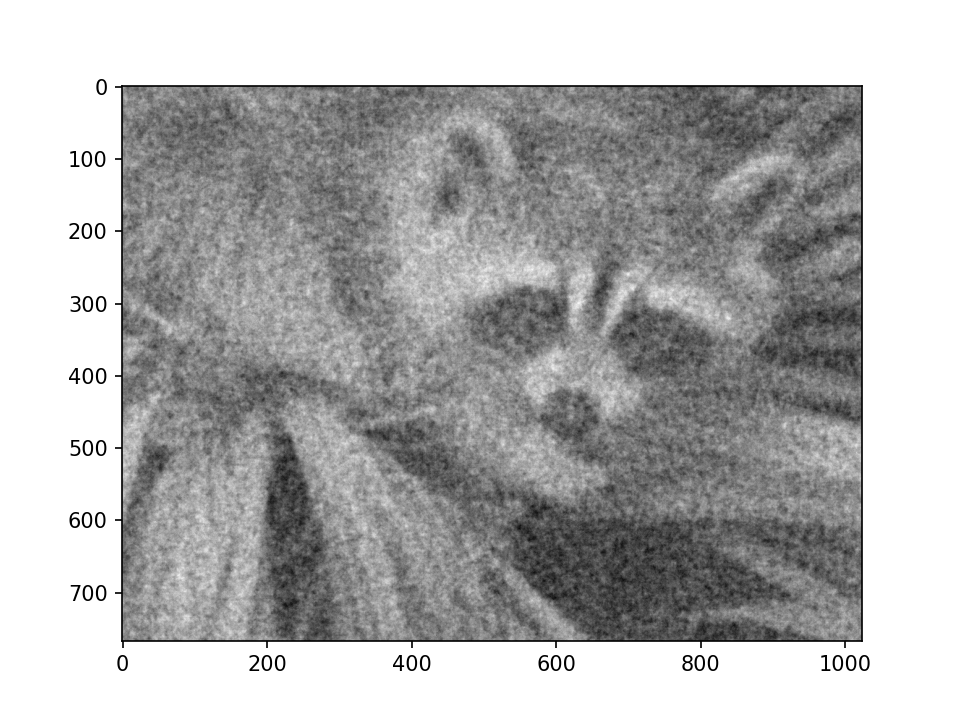

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [14]:
cur_res_list = np.load("ex5_res_min_euclids.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

##### For smoothness flavour 2, i.e., minimizing  $\left\| \mathbf{x}  \right\|^2_2$

In [ ]:
res_min_euclid_square = []
res_min_euclid_squares = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = HQS_general(img, h, lam, rho, x_upd_general, z_upd_min_euclid, num_iter)    
    res_min_euclid_square.append(x_hat)
    res_min_euclid_squares.append(x_hats[0::5])

In [ ]:
np.save("ex5_res_min_euclid_squares", res_min_euclid_squares)

<IPython.core.display.Javascript object>


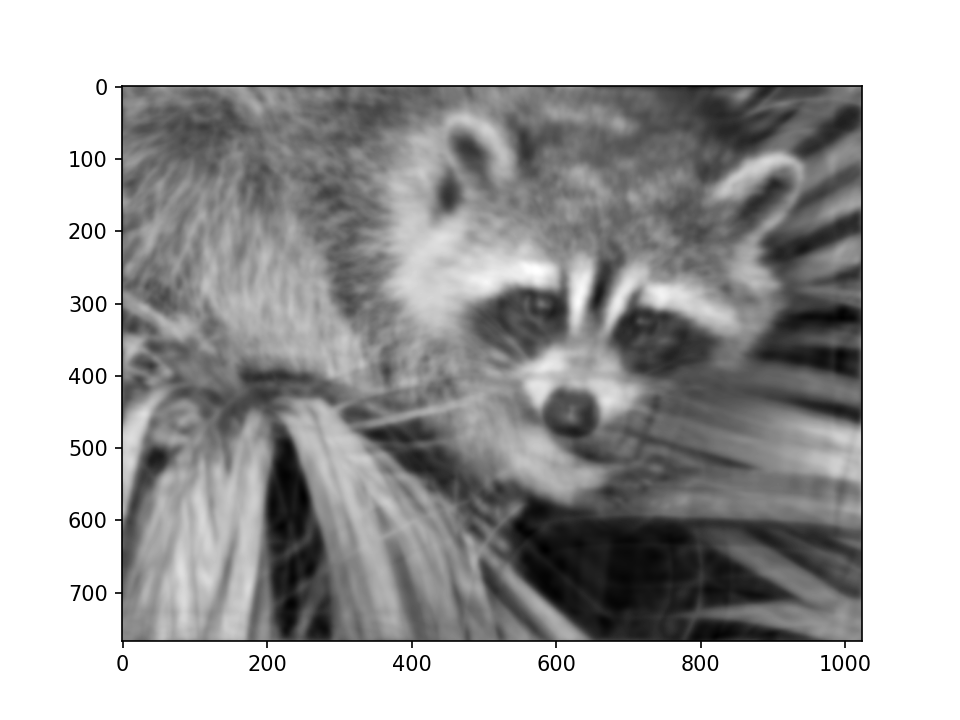

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [17]:
cur_res_list = np.load("ex5_res_min_euclid_squares.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

##### For sparseness, i.e., minimizing $\left\| \mathbf{x}  \right\|_1$

In [ ]:
res_min_1_norm = []
res_min_1_norms = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = HQS_general(img, h, lam, rho, x_upd_general, z_upd_min_1_norm, num_iter)    
    res_min_1_norm.append(x_hat)
    res_min_1_norms.append(x_hats[0::5])

In [ ]:
np.save("ex5_res_min_1_norms", res_min_1_norms)

<IPython.core.display.Javascript object>


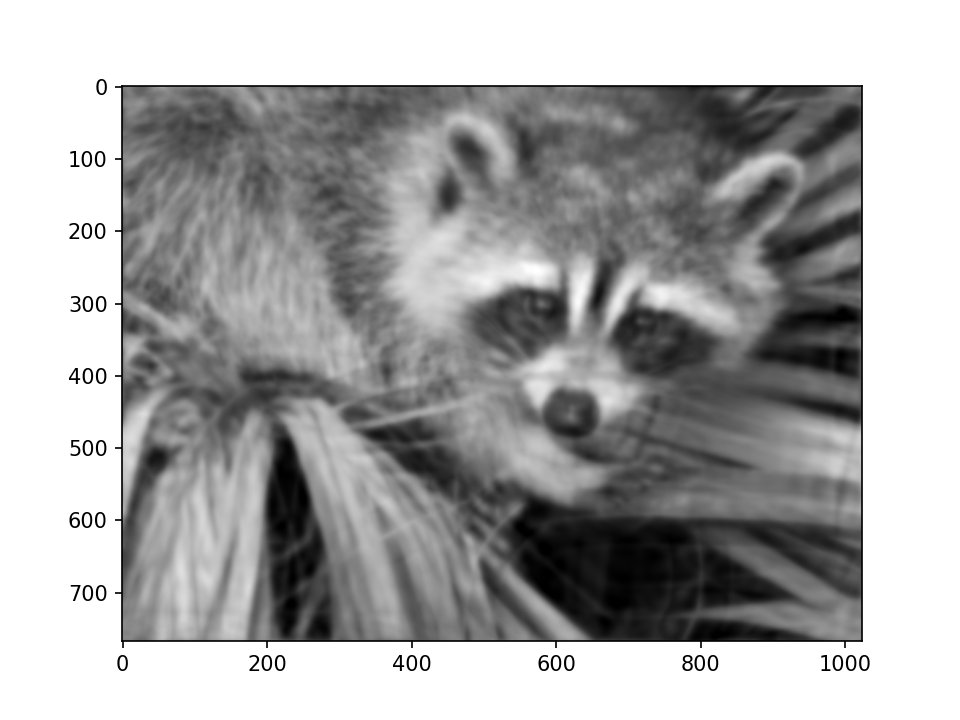

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [16]:
cur_res_list = np.load("ex5_res_min_1_norms.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

#### TV regularizer

In [18]:
def HQS_TV(b, kernel, lam, rho, x_upd, z_upd, num_iter):
    four_c = np.fft.fft2(np.fft.ifftshift(pad_like(kernel,b)))
    four_c_c = np.conjugate(four_c)
    four_b = np.fft.fft2(b)
    
    D_x = np.array([[0,0,0], [0,-1,1], [0,0,0]])
    D_y = np.array([[0,0,0], [0,-1,0], [0,1,0]])
    four_dx_x = np.fft.fft2(np.fft.ifftshift(pad_like(D_x,b)))
    four_dx_y = np.fft.fft2(np.fft.ifftshift(pad_like(D_y,b)))
    four_dx_x_c = np.conjugate(four_dx_x)
    four_dx_y_c = np.conjugate(four_dx_y)
    
    
    x = np.zeros_like(b)
    z1 = np.zeros_like(b)
    z2 = np.zeros_like(b)
    
    xs = []
    
    for i in range(0, num_iter):
        #def x_upd_tv(c, c_c, b, z1, z2, dx, dx_c, dy, dy_c, rho): # We want c, c_c (conjugated), b, dx, dx_c, dy and dy_c to be precalculated
        x = x_upd(four_c, four_c_c, four_b, z1, z2, four_dx_x, four_dx_x_c, four_dx_y, four_dx_y_c, rho)
        v1 = fourier_conv(x, D_x).flatten()
        v2 = fourier_conv(x, D_y).flatten()
        v = np.hstack((v1,v2))
        #z1, z2 = z_upd(x, lam, rho)
        z12 = z_upd(v, lam, rho)
        z1, z2 = np.split(z12, 2)
        z1 = np.reshape(z1, b.shape)
        z2 = np.reshape(z2, b.shape)
        
        xs.append(x)
    
    return x, xs    

##### For isotropic TV

In [ ]:
res_iso_tv = []
res_iso_tvs = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = HQS_TV(img, h, lam, rho, x_upd_tv, z_upd_iso_tv, num_iter)    
    res_iso_tv.append(x_hat)
    res_iso_tvs.append(x_hats[0::5])

In [ ]:
np.save("ex5_res_iso_tvs", res_iso_tvs)

<IPython.core.display.Javascript object>


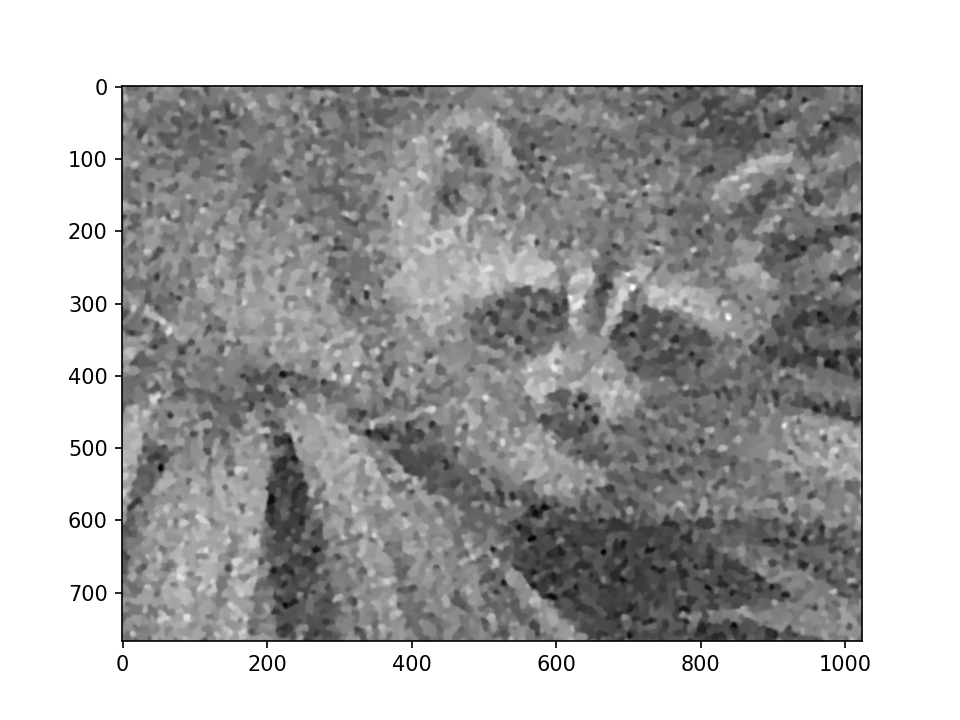

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [19]:
cur_res_list = np.load("ex5_res_iso_tvs.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

##### For anisotropic TV

In [ ]:
res_aniso_tv = []
res_aniso_tvs = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = HQS_TV(img, h, lam, rho, x_upd_tv, z_upd_min_1_norm, num_iter)    
    res_aniso_tv.append(x_hat)
    res_aniso_tvs.append(x_hats[0::5])

In [ ]:
np.save("ex5_res_aniso_tvs", res_aniso_tvs)

<IPython.core.display.Javascript object>


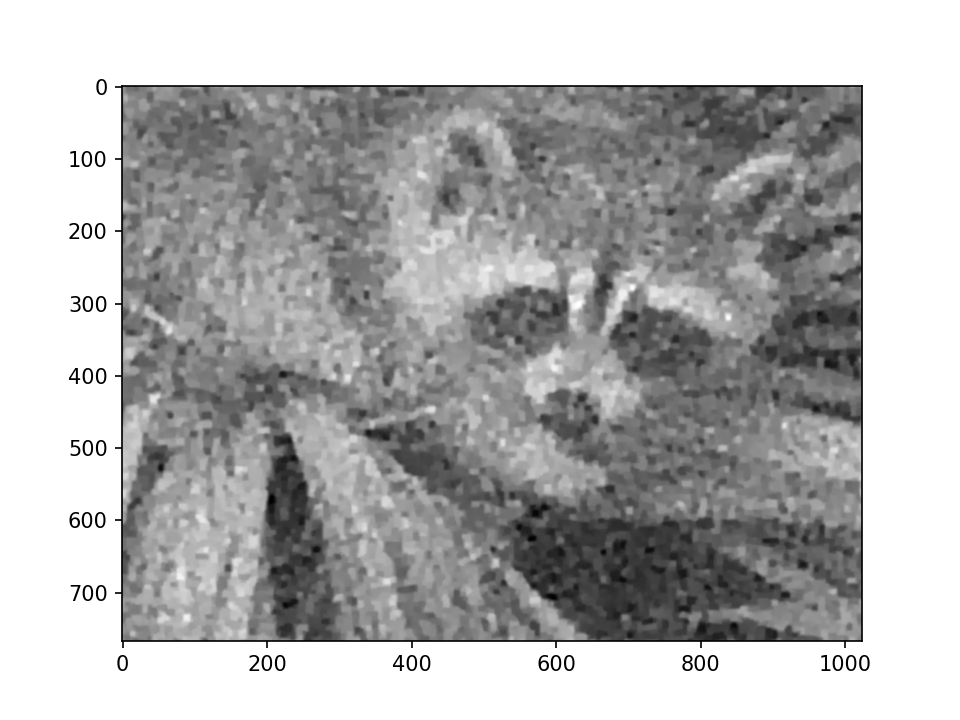

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [20]:
cur_res_list = np.load("ex5_res_aniso_tvs.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

## Alternating direction method of multipliers

Implement the ADMM method for deconvolution and also try the above regularizers.

We can build the ADMM implementation upon the already defined update codes. 

But we need to set a routine for the $\mathbf{u}$-update:

$\mathbf{u} \leftarrow \mathbf{u+Dx-z}$

As this can be implemented in a single line, we won't define an extra function for it and directly write the whole ADMM routine:

### General regularizer

In [21]:
def ADMM_general(b, kernel, lam, rho, x_upd, z_upd, num_iter):
    four_c = np.fft.fft2(np.fft.ifftshift(pad_like(kernel,b)))
    four_c_c = np.conjugate(four_c)
    four_b = np.fft.fft2(b)
    
    x = np.zeros_like(b)
    z = np.zeros_like(b)
    u = np.zeros_like(b)
    
    xs = []
    
    for i in range(0, num_iter):
        x = x_upd(four_c, four_c_c, four_b, z - u, rho)
        z = z_upd(x + u, lam, rho)
        u = u + x -z
        xs.append(x)
    
    return x, xs    

### TV regularizer

In [22]:
def ADMM_TV(b, kernel, lam, rho, x_upd, z_upd, num_iter):
    four_c = np.fft.fft2(np.fft.ifftshift(pad_like(kernel,b)))
    four_c_c = np.conjugate(four_c)
    four_b = np.fft.fft2(b)
    
    D_x = np.array([[0,0,0], [0,-1,1], [0,0,0]])
    D_y = np.array([[0,0,0], [0,-1,0], [0,1,0]])
    four_dx_x = np.fft.fft2(np.fft.ifftshift(pad_like(D_x,b)))
    four_dx_y = np.fft.fft2(np.fft.ifftshift(pad_like(D_y,b)))
    four_dx_x_c = np.conjugate(four_dx_x)
    four_dx_y_c = np.conjugate(four_dx_y)
    
    
    x = np.zeros_like(b)
    z1 = np.zeros_like(b)
    z2 = np.zeros_like(b)
    u1 = np.zeros_like(b)
    u2 = np.zeros_like(b)
    
    xs = []
    
    for i in range(0, num_iter):
        #def x_upd_tv(c, c_c, b, z1, z2, dx, dx_c, dy, dy_c, rho): # We want c, c_c (conjugated), b, dx, dx_c, dy and dy_c to be precalculated
        x = x_upd(four_c, four_c_c, four_b, z1 - u1, z2 - u2, four_dx_x, four_dx_x_c, four_dx_y, four_dx_y_c, rho)
        Dx1 = fourier_conv(x, D_x)
        Dx2 = fourier_conv(x, D_y)
        v1 = (Dx1 + u1).flatten()
        v2 = (Dx2 + u2).flatten()
        v = np.hstack((v1,v2))
        z12 = z_upd(v, lam, rho)
        z1, z2 = np.split(z12, 2)
        z1 = np.reshape(z1, b.shape)
        z2 = np.reshape(z2, b.shape)
        u1 = u1 + Dx1 - z1
        u2 = u2 + Dx2 - z2
        xs.append(x)
    
    return x, xs   

### Experiments

#### General regularizer

##### For smoothness, i.e., minimizing $\left\| \mathbf{x}  \right\|_2$

In [ ]:
admm_res_min_euclid = []
admm_res_min_euclids = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = ADMM_general(img, h, lam, rho, x_upd_general, z_upd_min_euclid, num_iter)    
    admm_res_min_euclid.append(x_hat)
    admm_res_min_euclids.append(x_hats[0::5])

In [ ]:
np.save("ex5_admm_res_min_euclids", admm_res_min_euclids)

<IPython.core.display.Javascript object>


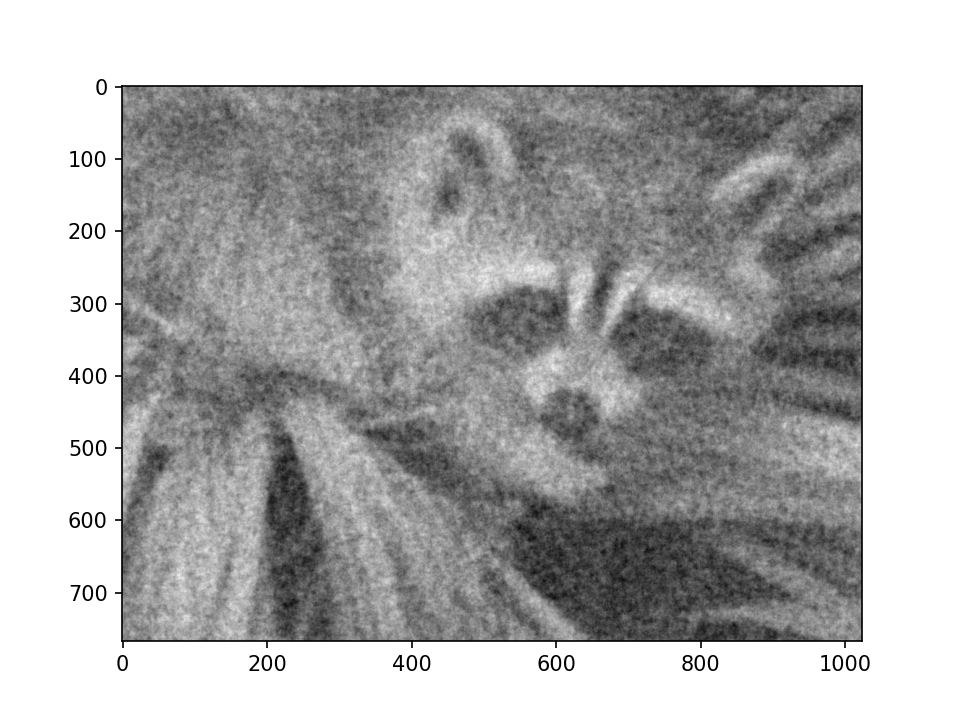

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [23]:
cur_res_list = np.load("ex5_admm_res_min_euclids.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

##### For smoothness flavour 2, i.e., minimizing  $\left\| \mathbf{x}  \right\|^2_2$

In [ ]:
admm_res_min_euclid_square = []
admm_res_min_euclid_squares = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = ADMM_general(img, h, lam, rho, x_upd_general, z_upd_min_euclid, num_iter)    
    admm_res_min_euclid_square.append(x_hat)
    admm_res_min_euclid_squares.append(x_hats[0::5])

In [ ]:
np.save("ex5_admm_res_min_euclid_squares", admm_res_min_euclid_squares)

<IPython.core.display.Javascript object>


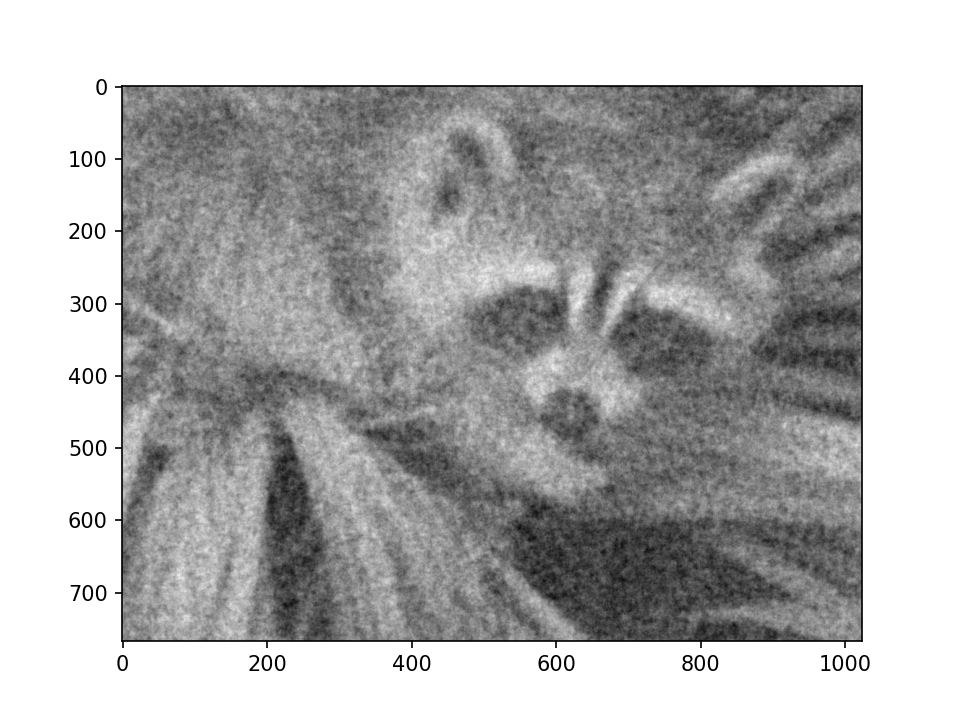

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [24]:
cur_res_list = np.load("ex5_admm_res_min_euclid_squares.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

##### For sparseness, i.e., minimizing $\left\| \mathbf{x}  \right\|_1$

In [ ]:
admm_res_min_1_norm = []
admm_res_min_1_norms = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = ADMM_general(img, h, lam, rho, x_upd_general, z_upd_min_1_norm, num_iter)    
    admm_res_min_1_norm.append(x_hat)
    admm_res_min_1_norms.append(x_hats[0::5])

In [ ]:
np.save("ex5_admm_res_min_1_norms", admm_res_min_1_norms)

<IPython.core.display.Javascript object>


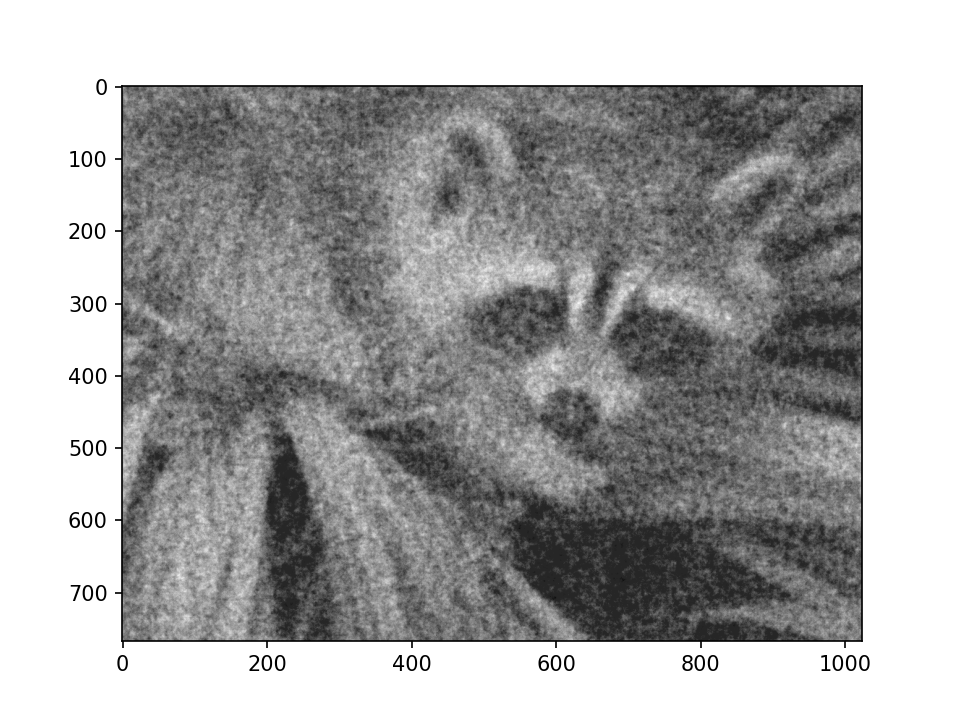

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [25]:
cur_res_list = np.load("ex5_admm_res_min_1_norms.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

#### TV regularizer

##### For isotropic TV

In [ ]:
admm_res_iso_tv = []
admm_res_iso_tvs = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = ADMM_TV(img, h, lam, rho, x_upd_tv, z_upd_iso_tv, num_iter)    
    admm_res_iso_tv.append(x_hat)
    admm_res_iso_tvs.append(x_hats[0::5])

In [ ]:
np.save("ex5_admm_res_iso_tvs", admm_res_iso_tvs)

<IPython.core.display.Javascript object>


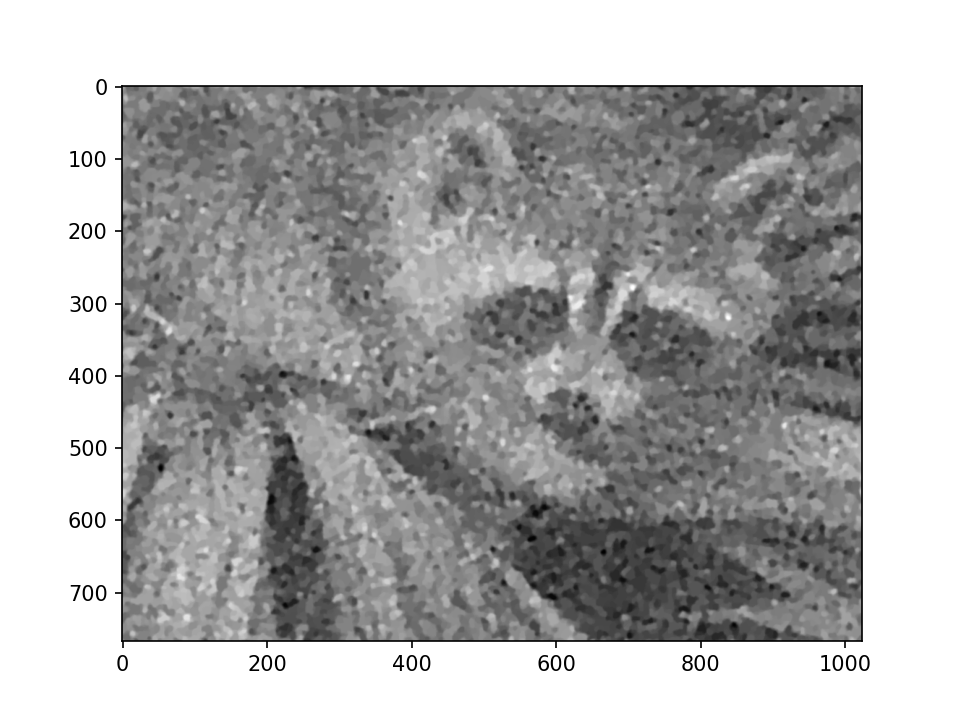

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [26]:
cur_res_list = np.load("ex5_admm_res_iso_tvs.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))

##### For anisotropic TV

In [ ]:
admm_res_aniso_tv = []
admm_res_aniso_tvs = []
num_iter = 50
lam = 0.5
rho = 0.5
for img in noises:
    x_hat, x_hats = ADMM_TV(img, h, lam, rho, x_upd_tv, z_upd_min_1_norm, num_iter)    
    admm_res_aniso_tv.append(x_hat)
    admm_res_aniso_tvs.append(x_hats[0::5])

In [ ]:
np.save("ex5_admm_res_aniso_tvs", admm_res_aniso_tvs)

<IPython.core.display.Javascript object>


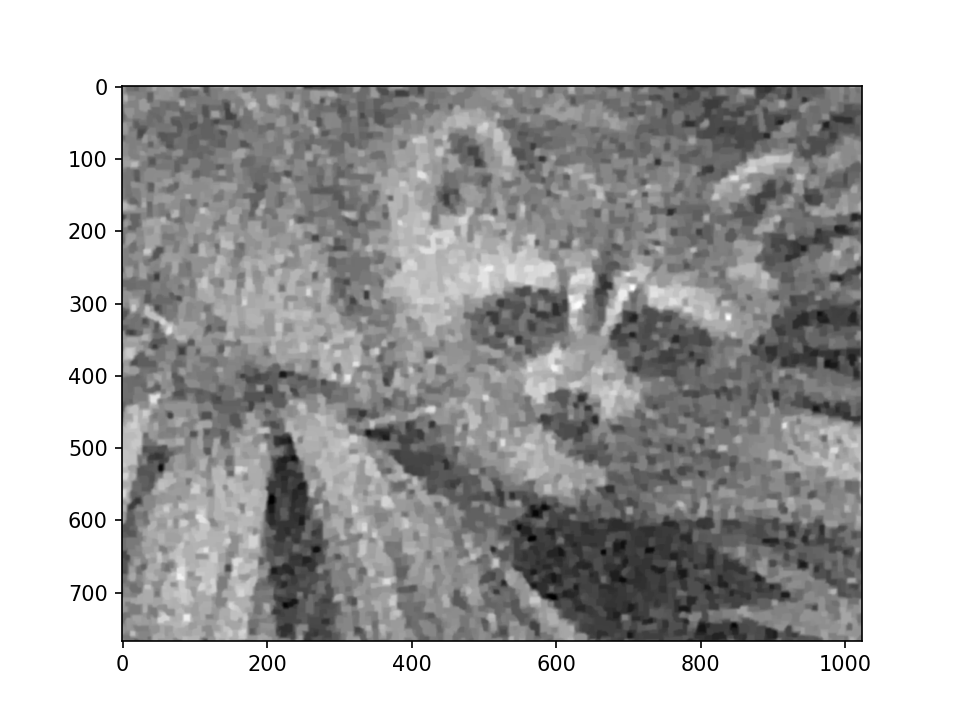

interactive(children=(IntSlider(value=0, description='sigma', max=5), IntSlider(value=0, description='i', max=…

<function __main__.<lambda>(sigma, i)>

In [27]:
cur_res_list = np.load("ex5_admm_res_aniso_tvs.npy")
plt.figure()
interact(lambda sigma, i: showResult(sigma, i, cur_res_list), sigma=widgets.IntSlider(min=0,max=len(cur_res_list)-1, step=1, value=0) ,i=widgets.IntSlider(min=0,max=len(cur_res_list[0])-1, step=1, value=0))